In [3]:
pip install MissForest


Note: you may need to restart the kernel to use updated packages.


In [4]:

import pandas as pd
import numpy as np

In [11]:
pip install scikit-learn


     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.6 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 461.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.9 MB 9.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/10.9 MB 21.0 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/10.9 MB 15.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/10.9 MB 16.1 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/10.9 MB 18.0 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/10.9 MB 16.2 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.9 MB 14.0 MB/s eta 0:00:01
   ----

In [17]:
pip install openpyxl


   ---------------------------------------- 0.0/251.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/251.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/251.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/251.3 kB 487.6 kB/s eta 0:00:01
   ----------------------------------- ---- 225.3/251.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 251.3/251.3 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
file_path = 'C:/Users/mhatr/OneDrive/Desktop/python lab course/Jitesh Project/MGT001437_ProjectC/data.xlsx'  # Replace this with the correct file path
data = pd.read_excel(file_path)

# Set appropriate column names using the second row and remove the first two rows
data.columns = data.iloc[1]
data = data.drop([0, 1])

# Reset the index and remove columns that are completely empty or unnamed
data = data.reset_index(drop=True)
data.columns = data.columns.str.strip()
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Identify columns that should be numeric
numeric_columns = [
    'Carbon content (wt%)', 'Hydrogen content (wt%)', 'Nitrogen content (wt%)',
    'Oxygen content (wt%)', 'Sulfur content (wt%)', 'Volatile matter (wt%)',
    'Fixed carbon (wt%)', 'Ash content (wt%)', 'Reaction temperature (°C)',
    'Microwave power (W)', 'Reaction time (min)', 'Microwave absorber percentage (%)',
    'Dielectric constant of absorber (ε′)', 'Dielectric loss factor of absorber (ε“)',
    'Bio-oil yield (%)', 'Syngas yield (%)', 'Syngas composition (H₂, mol%)',
    'Syngas composition (CH₄, mol%)', 'Syngas composition (CO₂, mol%)',
    'Syngas composition (CO, mol%)', 'Biochar yield (%)', 'Biochar calorific value (MJ/kg)',
    'Biochar H/C ratio (-)', 'Biochar H/N ratio (-)', 'Biochar O/C ratio (-)'
]

# Convert identified columns to numeric, coercing errors
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Separate numeric and non-numeric data
numeric_data = data[numeric_columns]
non_numeric_data = data.drop(columns=numeric_columns)

# Debugging: Print the structure of numeric_data
print("Numeric data columns:", numeric_data.columns)
print("Numeric data head:\n", numeric_data.head())
print("Non-numeric data columns:", non_numeric_data.columns)
print("Non-numeric data head:\n", non_numeric_data.head())

# Check if numeric_data is empty
if numeric_data.empty:
    raise ValueError("No numeric columns found in the dataset to impute.")

# Initialize the IterativeImputer
imputer = IterativeImputer(random_state=0)

# Impute missing values in the numeric data
imputed_data = imputer.fit_transform(numeric_data)

# Convert the imputed numpy array back to a DataFrame with appropriate column names
imputed_df = pd.DataFrame(imputed_data, columns=numeric_data.columns)

# Concatenate the imputed numeric data with the non-numeric columns
final_data = pd.concat([non_numeric_data.reset_index(drop=True), imputed_df.reset_index(drop=True)], axis=1)

# Display the first few rows of the final cleaned and imputed dataset
print(final_data.head())

# Save the cleaned and imputed dataset to a new Excel file
final_data.to_excel('cleaned_imputed_data.xlsx', index=False)


Numeric data columns: Index(['Carbon content (wt%)', 'Hydrogen content (wt%)',
       'Nitrogen content (wt%)', 'Oxygen content (wt%)',
       'Sulfur content (wt%)', 'Volatile matter (wt%)', 'Fixed carbon (wt%)',
       'Ash content (wt%)', 'Reaction temperature (°C)', 'Microwave power (W)',
       'Reaction time (min)', 'Microwave absorber percentage (%)',
       'Dielectric constant of absorber (ε′)',
       'Dielectric loss factor of absorber (ε“)', 'Bio-oil yield (%)',
       'Syngas yield (%)', 'Syngas composition (H₂, mol%)',
       'Syngas composition (CH₄, mol%)', 'Syngas composition (CO₂, mol%)',
       'Syngas composition (CO, mol%)', 'Biochar yield (%)',
       'Biochar calorific value (MJ/kg)', 'Biochar H/C ratio (-)',
       'Biochar H/N ratio (-)', 'Biochar O/C ratio (-)'],
      dtype='object', name=1)
Numeric data head:
 1  Carbon content (wt%)  Hydrogen content (wt%)  Nitrogen content (wt%)  \
0                 33.14                    5.58                    4.85   


In [25]:
# Save the cleaned and imputed dataset to a new Excel file
final_data.to_excel('cleaned_imputed_data.xlsx', index=False)


In [26]:
# Save the cleaned and imputed dataset to a new CSV file
final_data.to_csv('cleaned_imputed_data.csv', index=False)


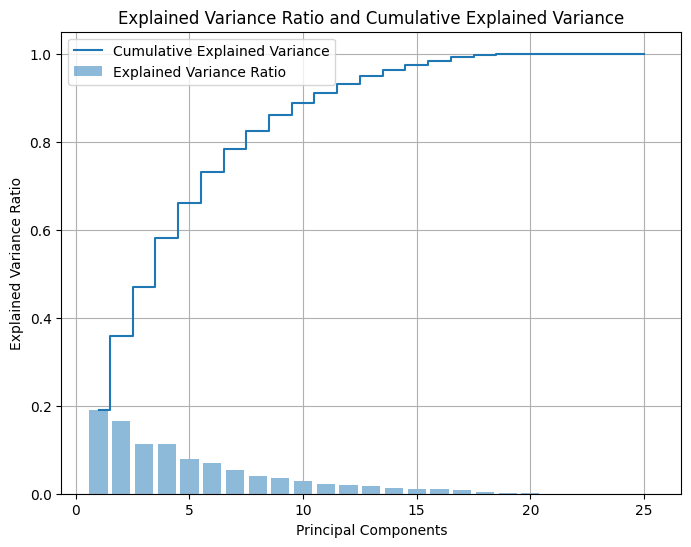

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Load your dataset
df = pd.read_excel('C:/Users/mhatr/OneDrive/Desktop/python lab course/Jitesh Project/cleaned_imputed_data.xlsx')

#Remove all columns that are strings
data = df.iloc[:,2:]

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center',
        label='Explained Variance Ratio')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio and Cumulative Explained Variance')
plt.legend(loc='best')
plt.grid()
plt.show()


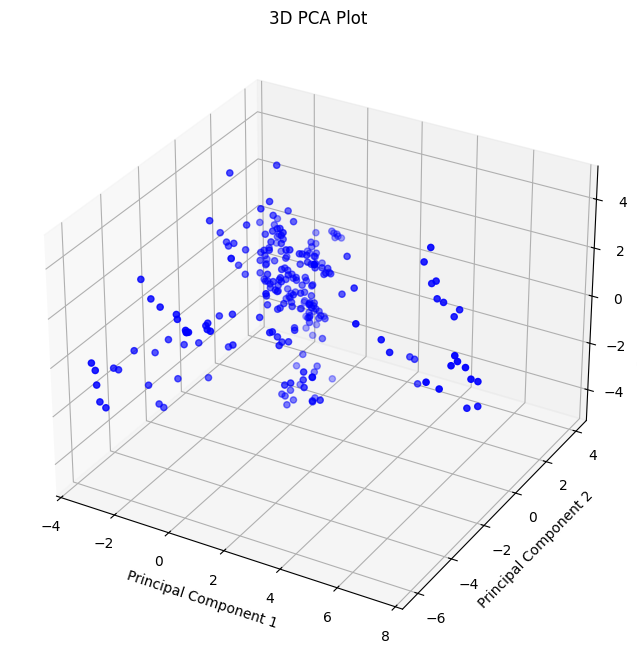

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load your dataset
df = pd.read_excel('C:/Users/mhatr/OneDrive/Desktop/python lab course/Jitesh Project/cleaned_imputed_data.xlsx')

# Remove all columns that are strings
data = df.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Add the original non-numeric data back to the DataFrame if needed
# non_numeric_data = df.select_dtypes(exclude=[np.number])
# pca_df = pd.concat([pca_df, non_numeric_data.reset_index(drop=True)], axis=1)

# Plot the 3D PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='b', marker='o')

ax.set_title('3D PCA Plot')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# If you have categories in your data you want to color by, you can use this instead of the simple scatter:
# categories = df['YourCategoryColumn']  # Replace with your category column
# unique_categories = categories.unique()
# colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']
# for category, color in zip(unique_categories, colors):
#     indices_to_keep = categories == category
#     ax.scatter(pca_df.loc[indices_to_keep, 'PC1'], 
#                pca_df.loc[indices_to_keep, 'PC2'], 
#                pca_df.loc[indices_to_keep, 'PC3'], 
#                c=color, 
#                s=50)
# ax.legend(unique_categories)

plt.show()


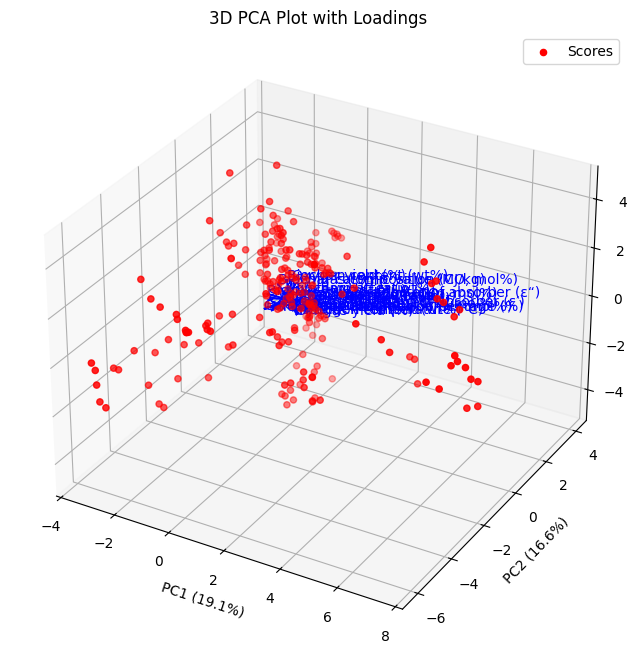

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load your dataset
df = pd.read_excel('C:/Users/mhatr/OneDrive/Desktop/python lab course/Jitesh Project/cleaned_imputed_data.xlsx')

# Remove all columns that are strings
data = df.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Plot the 3D PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='r', marker='o', label='Scores')

# Plot the loadings (arrows)
for i, (x, y, z) in enumerate(loadings):
    ax.quiver(0, 0, 0, x, y, z, color='b', arrow_length_ratio=0.1)
    ax.text(x, y, z, data.columns[i], color='b')

ax.set_title('3D PCA Plot with Loadings')
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0] * 100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1] * 100:.1f}%)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2] * 100:.1f}%)')

# Plot 95% confidence ellipse (optional, needs further calculation)
# This is a simplified version and may not match exactly
# from matplotlib.patches import Ellipse
# angle = np.arctan2(pca_df['PC2'], pca_df['PC1'])
# width = 2 * np.sqrt(pca.explained_variance_ratio_[0])
# height = 2 * np.sqrt(pca.explained_variance_ratio_[1])
# ell = Ellipse(xy=(np.mean(pca_df['PC1']), np.mean(pca_df['PC2'])),
#               width=width, height=height,
#               edgecolor='r', fc='None', lw=2, label='95% Confidence Ellipse')
# ax.add_patch(ell)

ax.legend()
plt.show()


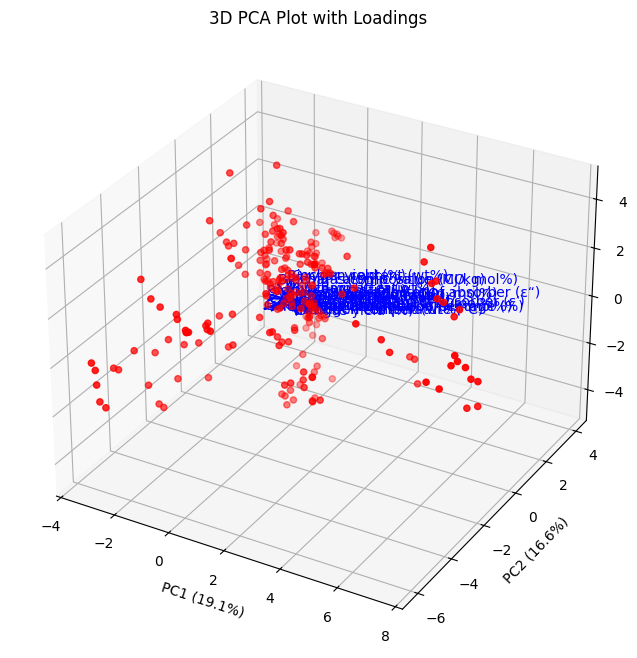

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load your dataset (replace with your own data)
df = pd.read_excel('C:/Users/mhatr/OneDrive/Desktop/python lab course/Jitesh Project/cleaned_imputed_data.xlsx')

# Remove any non-numeric columns
data = df.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Set up the 3D plotting environment
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the scores
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='r', marker='o', label='Scores')

# Add labels for loadings (optional)
for i, (x, y, z) in enumerate(pca.components_.T * np.sqrt(pca.explained_variance_)):
    ax.quiver(0, 0, 0, x, y, z, color='b', arrow_length_ratio=0.1)
    ax.text(x, y, z, data.columns[i], color='b')

# Set axis labels
ax.set_title('3D PCA Plot with Loadings')
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0] * 100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1] * 100:.1f}%)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2] * 100:.1f}%)')

plt.show()



In [7]:
import pandas as pd

# Load the data from the provided Excel file
file_path = 'C:/Users/mhatr/OneDrive/Desktop/python lab course/Jitesh Project/cleaned_imputed_data.xlsx'
df = pd.read_excel(file_path)

# Print out the column names to verify them
print(df.columns)

# Based on the printed column names, update the columns list
# Update the column names here based on the actual column names in the dataframe
columns = [
    'Carbon content (wt%)', 'Hydrogen content (wt%)', 'Nitrogen content (wt%)',
    'Oxygen content (wt%)', 'Sulfur content (wt%)', 'Volatile matter (wt%)',
    'Fixed carbon content (wt%)', 'Ash content (wt%)', 'Operating temperature (°C)',
    'Microwave power (W)'
]

# After verifying the actual column names, proceed with PCA
try:
    # Extract the data for PCA
    data = df[columns]
    
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Perform PCA
    pca = PCA(n_components=3)
    principal_components = pca.fit_transform(data)

    # Create a DataFrame with the PCA results
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

    # Plot the PCA in 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

    # Label the axes
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')

    # Set the title
    ax.set_title('3D PCA Plot')

    # Show the plot
    plt.show()

except KeyError as e:
    print(f"KeyError: {e}")
    print("Please update the 'columns' list with the correct column names based on the output above.")


Index(['Reference (DOI)', 'Biomass type', 'Carbon content (wt%)',
       'Hydrogen content (wt%)', 'Nitrogen content (wt%)',
       'Oxygen content (wt%)', 'Sulfur content (wt%)', 'Volatile matter (wt%)',
       'Fixed carbon (wt%)', 'Ash content (wt%)', 'Reaction temperature (°C)',
       'Microwave power (W)', 'Reaction time (min)',
       'Microwave absorber percentage (%)',
       'Dielectric constant of absorber (ε′)',
       'Dielectric loss factor of absorber (ε“)', 'Bio-oil yield (%)',
       'Syngas yield (%)', 'Syngas composition (H₂, mol%)',
       'Syngas composition (CH₄, mol%)', 'Syngas composition (CO₂, mol%)',
       'Syngas composition (CO, mol%)', 'Biochar yield (%)',
       'Biochar calorific value (MJ/kg)', 'Biochar H/C ratio (-)',
       'Biochar H/N ratio (-)', 'Biochar O/C ratio (-)'],
      dtype='object')
KeyError: "['Fixed carbon content (wt%)', 'Operating temperature (°C)'] not in index"
Please update the 'columns' list with the correct column names based on 

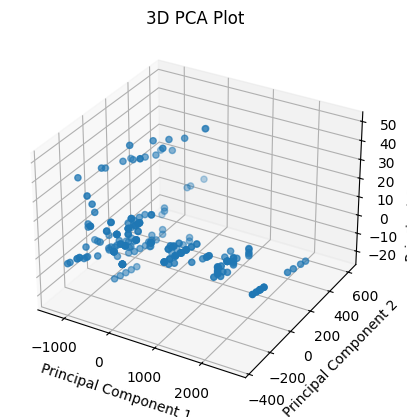

In [8]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data from the provided Excel file
file_path = 'C:/Users/mhatr/OneDrive/Desktop/python lab course/Jitesh Project/cleaned_imputed_data.xlsx'
df = pd.read_excel(file_path)

# Define the columns to be used for PCA based on the actual column names in the DataFrame
columns = [
    'Carbon content (wt%)', 'Hydrogen content (wt%)', 'Nitrogen content (wt%)',
    'Oxygen content (wt%)', 'Sulfur content (wt%)', 'Volatile matter (wt%)',
    'Fixed carbon (wt%)', 'Ash content (wt%)', 'Reaction temperature (°C)',
    'Microwave power (W)'
]

# Extract the data for PCA
data = df[columns]

# Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Plot the PCA in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

# Label the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Set the title
ax.set_title('3D PCA Plot')

# Show the plot
plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import numpy as np

# Load the data from the uploaded file
file_path = 'C:/Users/mhatr/OneDrive/Desktop/python lab course/Jitesh Project/MGT001437_ProjectC/data.xlsx'
data = pd.read_excel(file_path)

# Extract relevant columns (skip first two rows which are headers and subheaders)
data_clean = data.iloc[2:, 2:27].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data_clean = data_clean.dropna()

# Extract relevant features for PCA
features = data_clean[['Carbon content (wt%)', 'Hydrogen content (wt%)', 'Nitrogen content (wt%)',
                       'Oxygen content (wt%)', 'Sulfur content (wt%)', 'Volatile matter (wt%)',
                       'Fixed carbon (wt%)', 'Ash content (wt%)', 'Syngas yield (%)',
                       'Syngas composition (H₂, mol%)', 'Syngas composition (CH₄, mol%)',
                       'Syngas composition (CO₂, mol%)', 'Syngas composition (CO, mol%)',
                       'Biochar yield (%)', 'Biochar calorific value (MJ/kg)',
                       'Biochar H/C ratio (-)', 'Biochar H/N ratio (-)', 'Biochar O/C ratio (-)']]

# Perform PCA
pca = PCA(n_components=3)
transformed_data = pca.fit_transform(features)

# Get PCA components
components = pca.components_

# Create a 3D plot with arrowheads
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the transformed data
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], alpha=0.5)

# Plot the PCA components as arrows
for i in range(components.shape[1]):
    ax.quiver(0, 0, 0, components[0, i], components[1, i], components[2, i], 
              length=3, arrow_length_ratio=0.1)

# Set labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA with Arrowheads on Vectors')

plt.show()


KeyError: "None of [Index(['Carbon content (wt%)', 'Hydrogen content (wt%)',\n       'Nitrogen content (wt%)', 'Oxygen content (wt%)',\n       'Sulfur content (wt%)', 'Volatile matter (wt%)', 'Fixed carbon (wt%)',\n       'Ash content (wt%)', 'Syngas yield (%)',\n       'Syngas composition (H₂, mol%)', 'Syngas composition (CH₄, mol%)',\n       'Syngas composition (CO₂, mol%)', 'Syngas composition (CO, mol%)',\n       'Biochar yield (%)', 'Biochar calorific value (MJ/kg)',\n       'Biochar H/C ratio (-)', 'Biochar H/N ratio (-)',\n       'Biochar O/C ratio (-)'],\n      dtype='object')] are in the [columns]"

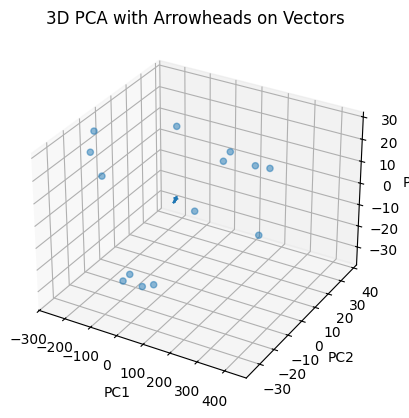

In [4]:
# Map column names to their respective headers based on their order
column_mapping = {
    'Unnamed: 3': 'Carbon content (wt%)',
    'Unnamed: 4': 'Hydrogen content (wt%)',
    'Unnamed: 5': 'Nitrogen content (wt%)',
    'Unnamed: 6': 'Oxygen content (wt%)',
    'Unnamed: 7': 'Sulfur content (wt%)',
    'Unnamed: 8': 'Volatile matter (wt%)',
    'Unnamed: 9': 'Fixed carbon (wt%)',
    'Unnamed: 10': 'Ash content (wt%)',
    'Unnamed: 17': 'Syngas yield (%)',
    'Unnamed: 18': 'Syngas composition (H₂, mol%)',
    'Unnamed: 19': 'Syngas composition (CH₄, mol%)',
    'Unnamed: 20': 'Syngas composition (CO₂, mol%)',
    'Unnamed: 21': 'Syngas composition (CO, mol%)',
    'Unnamed: 22': 'Biochar yield (%)',
    'Unnamed: 23': 'Biochar calorific value (MJ/kg)',
    'Unnamed: 24': 'Biochar H/C ratio (-)',
    'Unnamed: 25': 'Biochar H/N ratio (-)',
    'Unnamed: 26': 'Biochar O/C ratio (-)'
}

data_clean.rename(columns=column_mapping, inplace=True)

# Extract relevant features for PCA
features = data_clean[list(column_mapping.values())]

# Perform PCA
pca = PCA(n_components=3)
transformed_data = pca.fit_transform(features)

# Get PCA components
components = pca.components_

# Create a 3D plot with arrowheads
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the transformed data
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], alpha=0.5)

# Plot the PCA components as arrows
for i in range(components.shape[1]):
    ax.quiver(0, 0, 0, components[0, i], components[1, i], components[2, i], 
              length=3, arrow_length_ratio=0.1)

# Set labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA with Arrowheads on Vectors')

plt.show()


In [6]:
import pandas as pd 
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# load features and targets separately
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Data Scaling
x_scaled = StandardScaler().fit_transform(X)

# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=3)

# Fit and transform data
pca_features = pca.fit_transform(x_scaled)

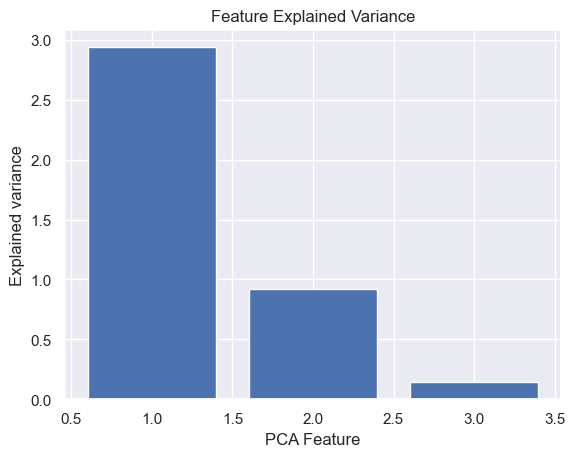

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

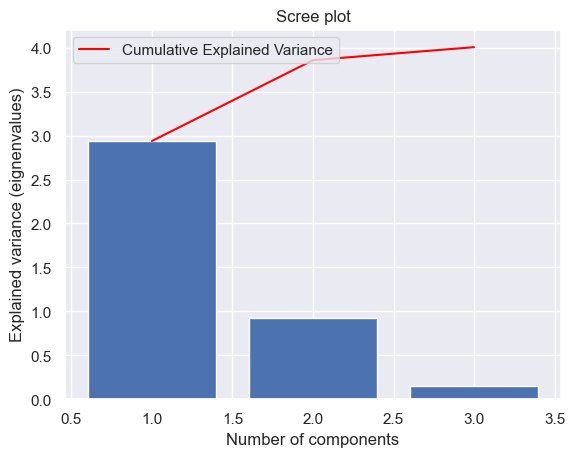

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

# Scree Plot
import numpy as np
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )

plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')

plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')

plt.show()

NameError: name 'xdata' is not defined

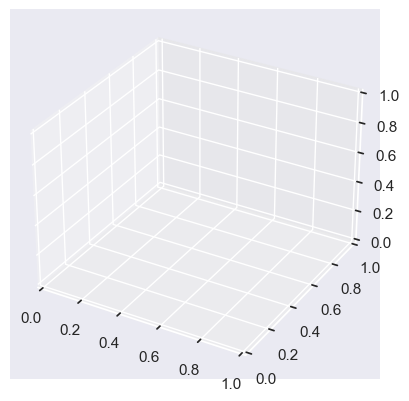

In [10]:
ax = plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

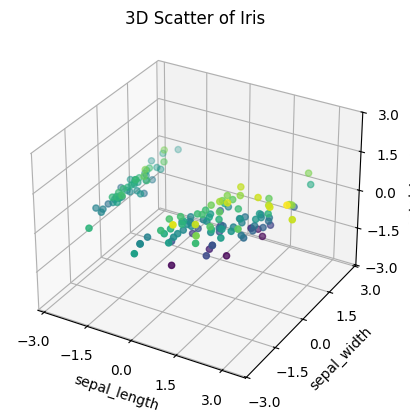

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

# Prepare 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot scaled features
xdata = pca_features[:,0]
ydata = pca_features[:,1]
zdata = pca_features[:,2]

# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# Plot title of graph
plt.title(f'3D Scatter of Iris')

# Plot x, y, z even ticks
ticks = np.linspace(-3, 3, num=5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)

# Plot x, y, z labels
ax.set_xlabel('sepal_length', rotation=150)
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length', rotation=60)
plt.show()

In [12]:
import pandas as pd
from sklearn.decomposition import PCA

# Reduce from 4 to 2 features with PCA
pca = PCA(n_components=2)

# Fit and transform data
pca_features = pca.fit_transform(x_scaled)

# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

# map target names to PCA features   
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}

pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)

pca_df.head()

,PC1,PC2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


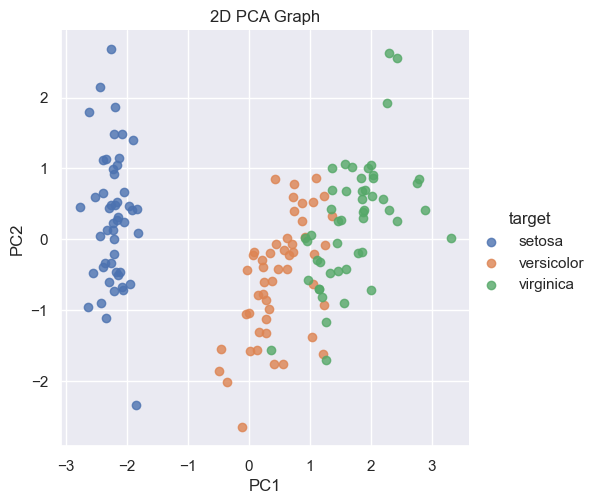

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )

plt.title('2D PCA Graph')
plt.show()

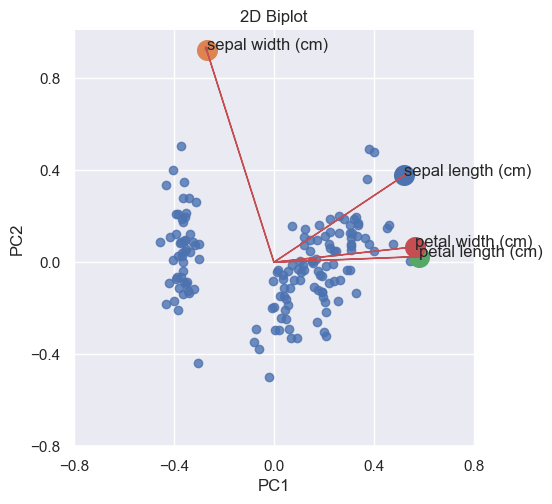

In [15]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
sns.set()

# load features and targets separately
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Scale Data 
x_scaled = StandardScaler().fit_transform(X)

# Perform PCA on Scaled Data
pca = PCA(n_components=2)

pca_features = pca.fit_transform(x_scaled)

# Principal components correlation coefficients
loadings = pca.components_

# Number of features before PCA
n_features = pca.n_features_in_

# Feature names before PCA
feature_names = iris.feature_names

# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]

# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))

# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')


# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]


# Create DataFrame from PCA
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

# Map Targets to names
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}

pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)

# Scale PCS into a DataFrame
pca_df_scaled = pca_df.copy()

scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())

for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]


# Plot the loadings on a Scatter plot
xs = loadings[0]
ys = loadings[1]

sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df_scaled, 
    fit_reg=False, 
    )

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)

xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.title('2D Biplot')
plt.show()

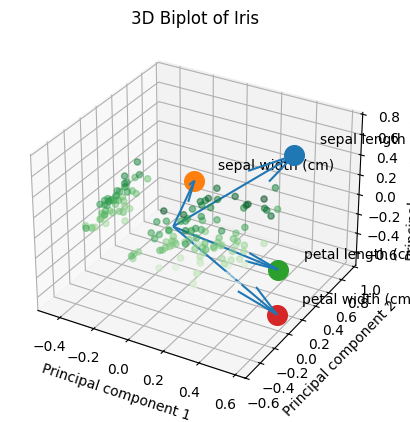

In [16]:
import numpy as np 
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use('default')

# load features and targets separately
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Scale Data 
x_scaled = StandardScaler().fit_transform(X)


pca = PCA(n_components=3)

# Fit and transform data
pca_features = pca.fit_transform(x_scaled)

# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])

# map target names to PCA features   
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}

# Apply the targett names
pca_df['target'] = iris.target
pca_df['target'] = pca_df['target'].map(target_names)

# Create the scaled PCA dataframe
pca_df_scaled = pca_df.copy()

scaler_df = pca_df[['PC1', 'PC2', 'PC3']]
scaler = 1 / (scaler_df.max() - scaler_df.min())

for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

# Initialize the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define scaled features as arrays
xdata = pca_df_scaled['PC1']
ydata = pca_df_scaled['PC2']
zdata = pca_df_scaled['PC3']

# Plot 3D scatterplot of PCA
ax.scatter3D(
    xdata, 
    ydata, 
    zdata, 
    c=zdata, 
    cmap='Greens', 
    alpha=0.5)

# Define the x, y, z variables
loadings = pca.components_
xs = loadings[0]
ys = loadings[1]
zs = loadings[2]

# Plot the loadings
for i, varnames in enumerate(feature_names):
    ax.scatter(xs[i], ys[i], zs[i], s=200)
    ax.text(
        xs[i] + 0.1, 
        ys[i] + 0.1, 
        zs[i] + 0.1, 
        varnames)

# Plot the arrows
x_arr = np.zeros(len(loadings[0]))
y_arr = z_arr = x_arr
ax.quiver(x_arr, y_arr, z_arr, xs, ys, zs)

# Plot title of graph
plt.title(f'3D Biplot of Iris')

# Plot x, y, z labels
ax.set_xlabel('Principal component 1', rotation=150)
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3', rotation=60)

plt.show()

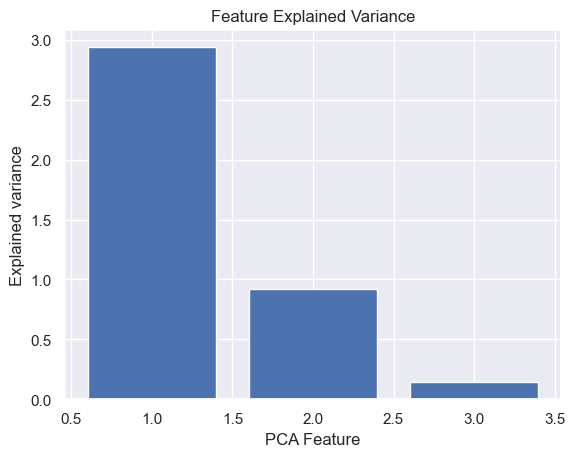

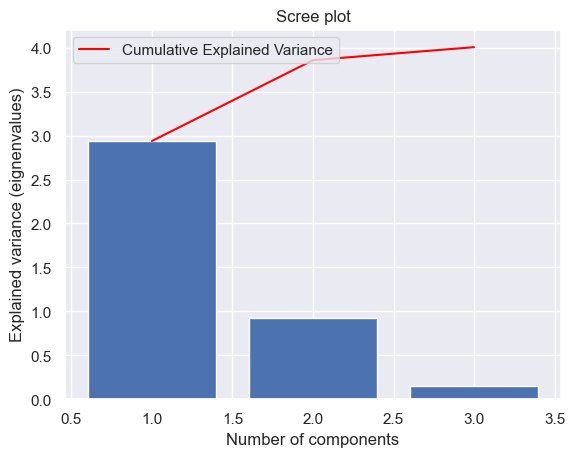

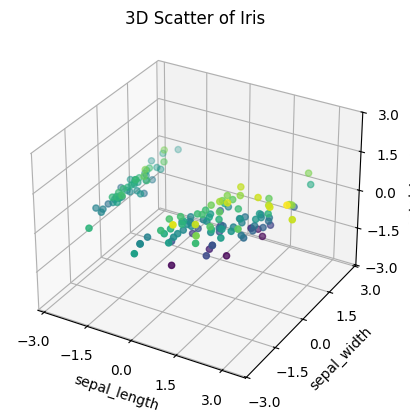

In [17]:
import pandas as pd 
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
sns.set()

# load features and targets separately
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Data Scaling
x_scaled = StandardScaler().fit_transform(X)

# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=3)

# Fit and transform data
pca_features = pca.fit_transform(x_scaled)

# Plot Featured Explained Variance


# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()


# Scree Plot
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )

plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')

plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')

plt.show()


plt.style.use('default')


# Prepare 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot scaled features
xdata = pca_features[:,0]
ydata = pca_features[:,1]
zdata = pca_features[:,2]

# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# Plot title of graph
plt.title(f'3D Scatter of Iris')

# Plot x, y, z even ticks
ticks = np.linspace(-3, 3, num=5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)

# Plot x, y, z labels
ax.set_xlabel('sepal_length', rotation=150)
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length', rotation=60)
plt.show()

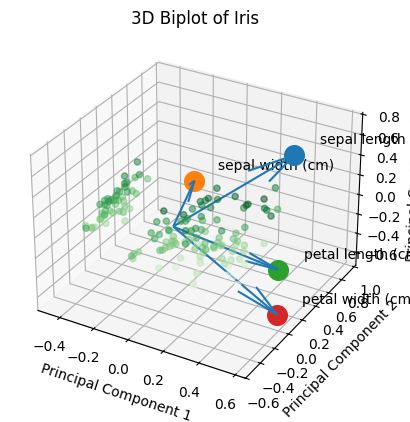

In [18]:

import numpy as np 
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Scale the iris dataset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Perform PCA on the iris dataset
pca = PCA(n_components=3)
pca_features = pca.fit_transform(x_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2', 'PC3'])

# Map target names to PCA features
target_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)

# Create the scaled PCA DataFrame
pca_df_scaled = pca_df.copy()

scaler_df = pca_df[['PC1', 'PC2', 'PC3']]
scaler = 1 / (scaler_df.max() - scaler_df.min())

for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

# Initialize the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define scaled features as arrays
xdata = pca_df_scaled['PC1']
ydata = pca_df_scaled['PC2']
zdata = pca_df_scaled['PC3']

# Plot 3D scatterplot of PCA
ax.scatter3D(
    xdata, 
    ydata, 
    zdata, 
    c=zdata, 
    cmap='Greens', 
    alpha=0.5)

# Define the x, y, z variables for loadings
loadings = pca.components_
feature_names = iris.feature_names
xs = loadings[0]
ys = loadings[1]
zs = loadings[2]

# Plot the loadings
for i, varnames in enumerate(feature_names):
    ax.scatter(xs[i], ys[i], zs[i], s=200)
    ax.text(
        xs[i] + 0.1, 
        ys[i] + 0.1, 
        zs[i] + 0.1, 
        varnames)

# Plot the arrows
x_arr = np.zeros(len(loadings[0]))
y_arr = z_arr = x_arr
ax.quiver(x_arr, y_arr, z_arr, xs, ys, zs)

# Plot title of graph
plt.title('3D Biplot of Iris')

# Plot x, y, z labels
ax.set_xlabel('Principal Component 1', rotation=150)
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3', rotation=60)

plt.show()


